In [35]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100)

In [36]:
mba_salary_df = pd.read_csv('MBA Salary.csv' )
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [37]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
S. No.                    50 non-null int64
Percentage in Grade 10    50 non-null float64
Salary                    50 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [38]:
#Descriptive Stats using Pandas profiling ###

In [39]:
import pandas_profiling

In [40]:
pfr = pandas_profiling.ProfileReport(mba_salary_df)
pfr.to_file("MBA_Salary_Prediction_EDA_report.html")

In [41]:
#Target Variable -  Numeric - Regression
#target Variable - Catagory - Classification


###Linear form or Non linear 
#Linear - Linear Regression for regression
#       - Logistic Regression for Classsifaction
###### Statsmodel / sklearn ####


######Assumption check for Linearity############, if assumptions are met then it is linear, otherwise try non linear algos

#Non Linear:
#Regression - SVM, KNN, Decision Tree, Random FOrest, XGboost, AdaBoost, Neural Network.....

#Classification - Naive Bayes, SVM, KNN, Decision Tree, Random FOrest, XGboost, AdaBoost, Neural Network.....
#sklearn library


#pyspark - Spark MLib

###Enterprise level####
# H2O.ai - Auto Selection, Programming, Drag and drop
# Knime Analytics - Drag and drop and coading
#Orange - Pictorial drag and drop

In [42]:
mba_salary_df.columns

Index(['S._No.', 'Percentage_in_Grade_10', 'Salary'], dtype='object')

In [43]:
import statsmodels.api as sm

In [44]:
X = sm.add_constant( mba_salary_df['Percentage_in_Grade_10'] )
X.head(5)

,const,Percentage_in_Grade_10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [45]:
Y = mba_salary_df['Salary']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 99999 )

In [48]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

In [49]:
mba_salary_lm

In [50]:
print( mba_salary_lm.params )

const                     36086.456578
Percentage_in_Grade_10     3492.397999
dtype: float64


In [51]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.158     
Dependent Variable:       Salary                AIC:                     1015.9909 
Date:                     2020-03-21 20:47      BIC:                     1019.3687 
No. Observations:         40                    Log-Likelihood:          -506.00   
Df Model:                 1                     F-statistic:             8.310     
Df Residuals:             38                    Prob (F-statistic):      0.00645   
R-squared:                0.179                 Scale:                   5.9890e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  36086.4566 79034.0017 0.4566 0.6506 -123909.5153 196082.4285
Percentage_in_Grade_10  3492.3980  1211.4791 2.8828 0.0065    1039.8868   5944.9092
-----------------------------------------------------------------------------------
Omnibus:                    3.450              Durbin-Watson:                 2.219
Prob(Omnibus):              0.178              Jarque-Bera (JB):              1.816
Skew:                       0.222              Prob(JB):                      0.403
Kurtosis:                   2.055              Condition No.:                 421  
===================================================================================

"""

In [32]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 576x432 with 0 Axes>

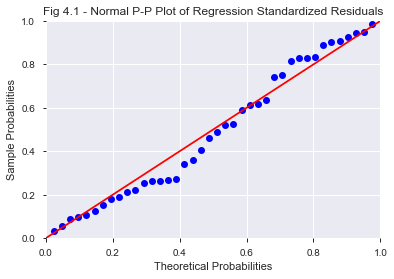

In [33]:
mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot( mba_salary_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [34]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

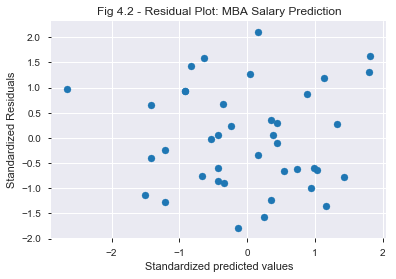

In [35]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ),
get_standardized_values( mba_salary_resid ) )
plt.title( "Fig 4.2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [36]:
from scipy.stats import zscore

In [37]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )

In [38]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S._No.,Percentage_in_Grade_10,Salary,z_score_salary


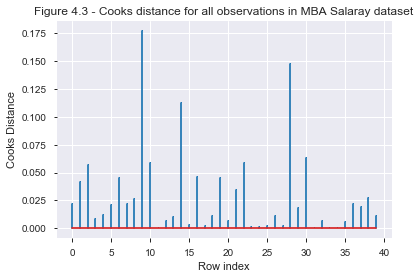

In [39]:
import numpy as np
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in MBA Salaray dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

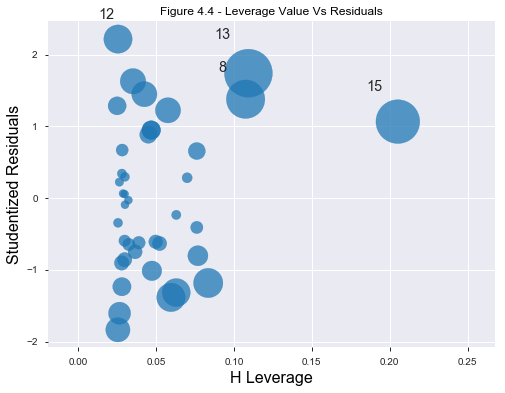

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( mba_salary_lm, ax = ax )
plt.title( "Figure 4.4 - Leverage Value Vs Residuals")
plt.show();

In [32]:
pred_y = mba_salary_lm.predict( test_X )

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
np.abs(r2_score(test_y, pred_y))

0.15664584974230378

In [35]:
import numpy

In [36]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346894

In [37]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Predict the y values
pred_y = mba_salary_lm.predict( test_X )
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm,
test_X,
alpha = 0.1)
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'],
'pred_y': pred_y,
'pred_y_left': pred_y_low,
'pred_y_right': pred_y_high } )

In [38]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182
